# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

To determine if the new landing page of an online news portal is an effective way to acquire new subscribers based on the interests of its visitors, the following tasks need to be completed:

Perform Exploratory Data Analysis on the dataset to extract insights.
Use a significance level of 0.05 for all tests conducted.
Answer the following questions:
a. Do users spend more time on the new landing page compared to the existing landing page?
b. Is the conversion rate for the new landing page greater than the conversion rate for the old landing page?
c. Does the converted status depend on the preferred language of the user?
d. Is the average time spent on the new landing page the same for users who prefer different languages?

## Import all the necessary libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)   # adds background to the graph
from PIL import Image

# Library required for statistical analysis

import scipy.stats as stats

In [27]:
# Library required to suppress any warning messages

import warnings
warnings.filterwarnings('ignore')

# Creating an array of color codes to use in this project

colors = ['#4178FB','#4DE0FA','#7DFFC6']

# Setting custom color palette

sns.set_palette(sns.color_palette(colors))



## Reading the Data into a DataFrame

In [28]:
# read the data
df = pd.read_csv('DATA/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [42]:
data=df.copy()

In [43]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [44]:
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [45]:
data.shape

(100, 6)

Observation: We can infer that there are 100 samples and 6 variables available to analyze for gaining insights based on the shape of the data as well as the information obtained from the head and tail of the data.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [47]:
data["user_id"]=data["user_id"].astype("category")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    object  
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 9.0+ KB


Observation: The data in the user_id variable cannot be considered as integer-type even though it contains numbers as it represents an identity code and should be treated as a category. On the other hand, time_spent_on_the_page is the only variable that can be considered as numerical/continuous for the analysis as it consists of time measurements in seconds.

In [49]:
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [50]:
data.duplicated().sum()

0

In [51]:
data.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


<AxesSubplot:xlabel='time_spent_on_the_page'>

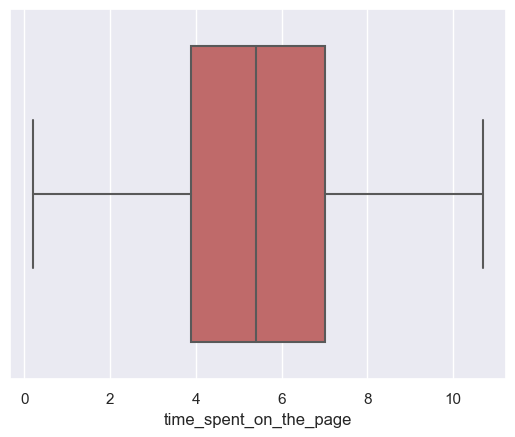

In [23]:
sns.boxplot(data['time_spent_on_the_page'], color='indianred')

observation: As previously, the only variable we have that is numerical and continuous is time_spent_on_the_page, which we will be analyzing. Our sample size is 100, with the users' mean time spent on a page being 5.3 minutes. The minimum time spent on a page is 0.19 minutes, while the maximum time spent on a page is 10.71 minutes.

In [21]:
data.describe(include=["category"])

,user_id
count,100
unique,100
top,546443
freq,1


 rewrite : Observation
Based on the description, head and tail of the data we can note the following: • We have 100 unique users.
• Users are equally divided into 2 groups: Control and Treatment.
• Users are exposed to 2 different types of landing pages: Old and New.
• Out of 100, 55 users are converted into subscribers. • Users are divided by 3 different preferred languages.

### Univariate Analysis

1. Group

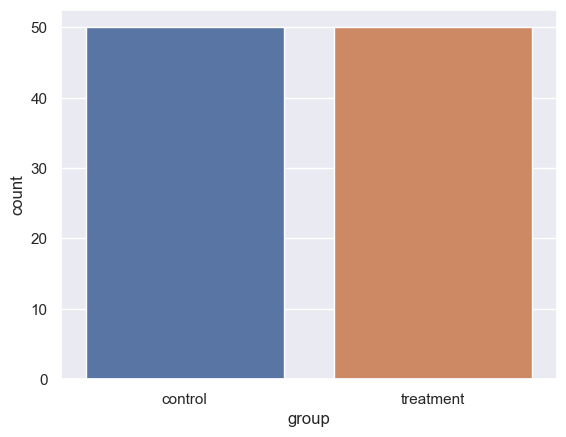

In [25]:
ax = sns.countplot(data['group'])
bar_perc = (ax, data['group']) 

Both Control and Treatment are equal in count of users.

2. landing page 

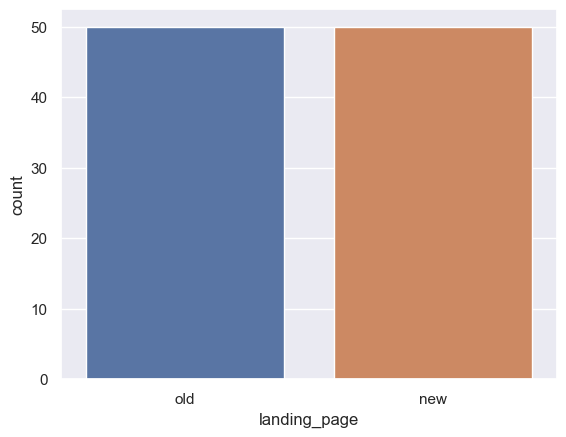

In [27]:
ax = sns.countplot(data['landing_page'])
bar_perc=(ax, data['landing_page'])

the visual representation of the landing page variable confirms that we have 2 types: Old & New that have 50 users each.

3. Time spent on the page

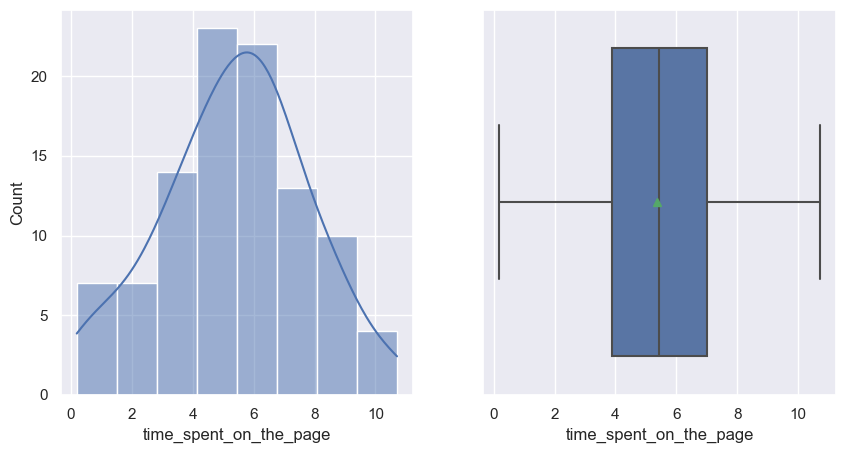

In [29]:
plt.figure(figsize = (10,5))       # defining the image size
plt.subplot(1,2,1)                 # specifying the placement of the 1st subplot
sns.histplot(data['time_spent_on_the_page'], kde = True)    # creating a histplot showing kde, as the 1st subplot
plt.subplot(1,2,2)                 # specifying the placement of the 2nd subplot
sns.boxplot(x = data['time_spent_on_the_page'], showmeans = True)  # creating a boxplot indicating mean, as the 2nd subplot
plt.show()                         # displaying both subplots

The visual representation of the time spent variable confirms the observations noted
earlier: the mean time spent on a page by the users is 5.3 minutes, with a minimum of
0.19, and a maximum of 10.71 minutes. The median is 5.4 minutes.

4. converted

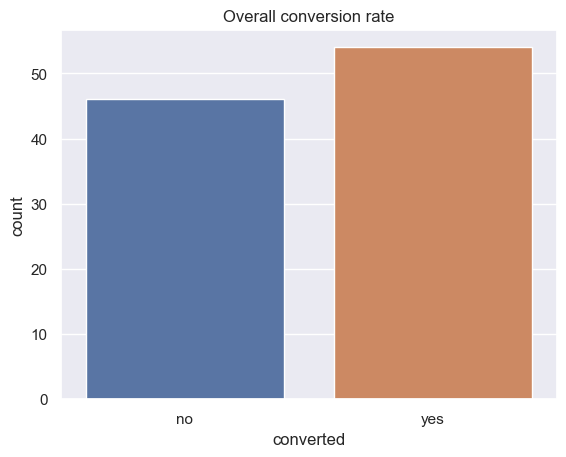

In [32]:
ax = sns.countplot(data['converted'])
plt.title('Overall conversion rate')
bar_perc = (ax, data['converted'])

more than 50 out of 100 customers have subscribed to the portal

5. Language preferred

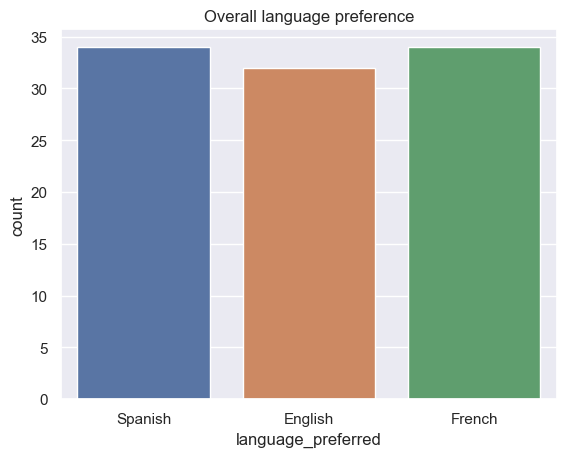

In [35]:
ax = sns.countplot(data['language_preferred'])
plt.title('Overall language preference')
bar_perc=(ax, data['language_preferred'])

there are equal count of people preferred reading in french and spanish more than english.

### Bivariate Analysis

1. group vs landing page

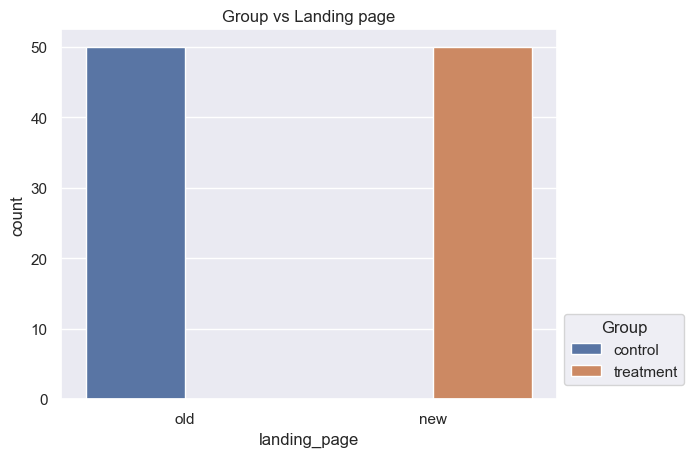

In [37]:
ax = sns.countplot(x = 'landing_page', data = data, hue = 'group' )
bar_perc = (ax, data['landing_page'])
plt.title('Group vs Landing page')   # giving a title to the plot
plt.legend(title = 'Group',bbox_to_anchor = (1,0.25))  # specifying the title and position of the labels mentioned in the key
plt.show()   # displaying the plot

count is equal in new and old page = 50

2. group vs time spent 

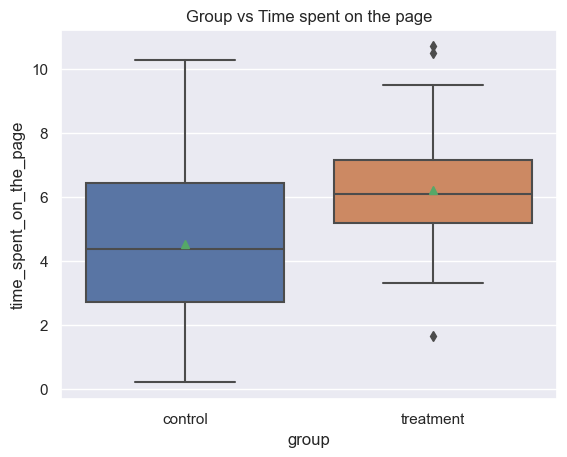

In [38]:
sns.boxplot(x = 'group', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Group vs Time spent on the page')
plt.show()

control : 

no outliers observed
mean time is about 5 mins

treatment :

there are outlieres in both sides
mean about 6 min 


3. Group vs Converted

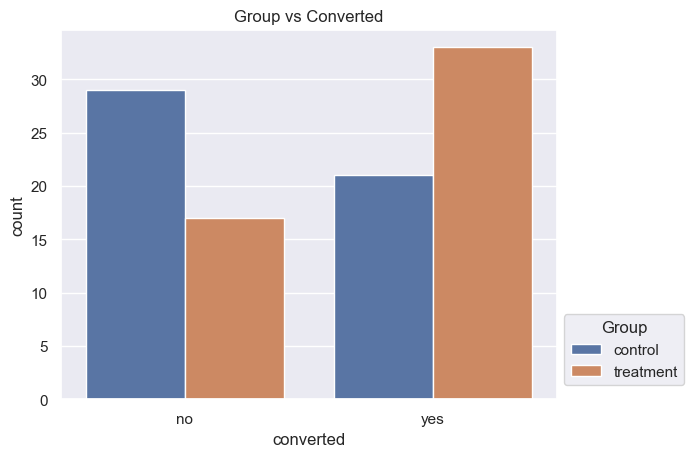

In [40]:
ax = sns.countplot(x = 'converted', data = data, hue = 'group')
bar_perc=(ax, data['converted'])
plt.title('Group vs Converted')
plt.legend(title = 'Group', bbox_to_anchor = (1,0.25))
plt.show()

control:

The number of users who converted is much less than those whose did not

treatment:

The number of users who converted is much larger in this group comparatively

4. Group vs Language preferred

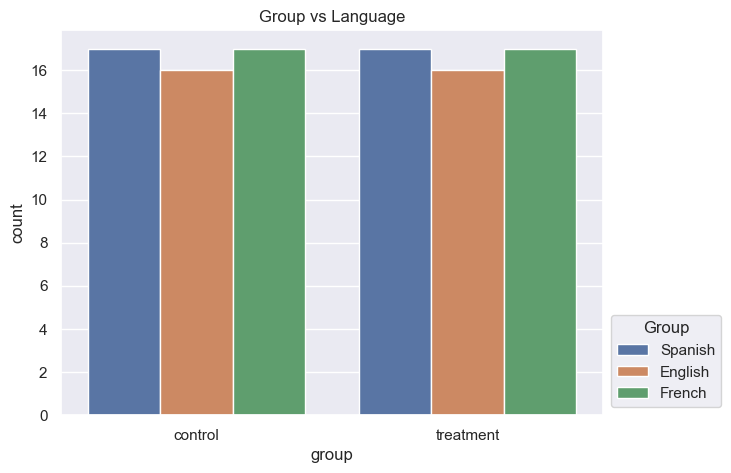

In [41]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'group')
bar_perc=(ax, data['language_preferred'])
plt.title('Group vs Language')
plt.legend(title = 'Group', bbox_to_anchor = (1,0.28))
plt.show()

the number of users for each of the languages is almost equal for both groups.

5. Landing page vs Time spent

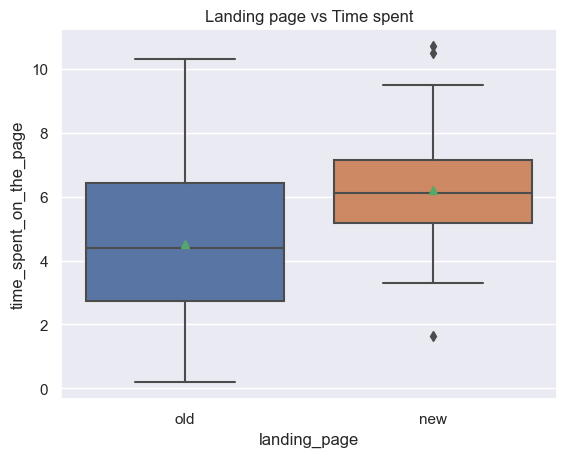

In [42]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Landing page vs Time spent')
plt.show()

New page:

The minimum time spent is about 3 mins and maximum time spent is around 9 mins
Outliers spotted on both sides
Mean time is around 6 mins and is equal to 50th percentile

Old page:

The minimum time spent is close to 0 and the maximum time spent is a little above 10 mins
No outliers
Mean is around 5 mins and it overlaps the 50th percentil

## the time spent on the new landing page is higher than the old.

6. Landing page vs Converted

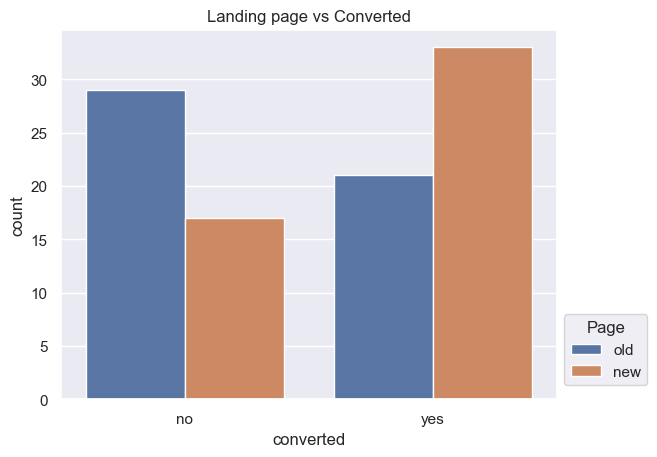

In [44]:
ax = sns.countplot(hue = 'landing_page', data = data, x = 'converted')
bar_perc=(ax, data['converted'])
plt.title('Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.25))
plt.show()

New page:

33 users have become subscribers ; 17 have not subscribed

Old page:

21 users have subscribed to the webportal ; 29 have not subscribed

conversion rate is higher for the new landing page.

7. Landing page vs Language preferred

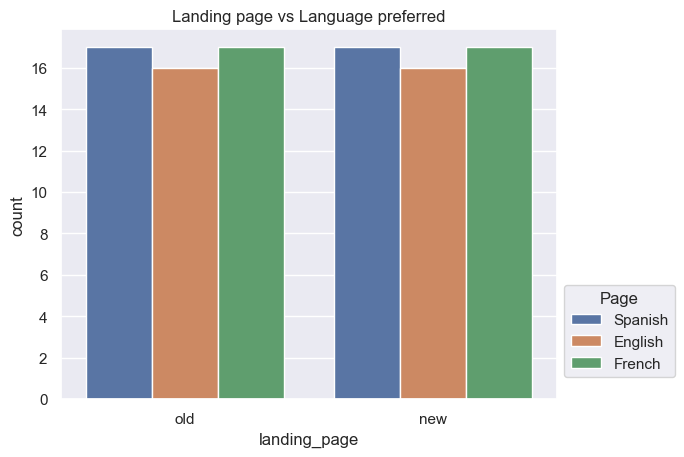

In [46]:
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'landing_page')
bar_perc=(ax, data['language_preferred'])
plt.title('Landing page vs Language preferred')
plt.legend(title = 'Page',bbox_to_anchor = (1,0.33))
plt.show()

The number of users for all three languages are equal for both new and old landing page

8. Time spent vs Converted

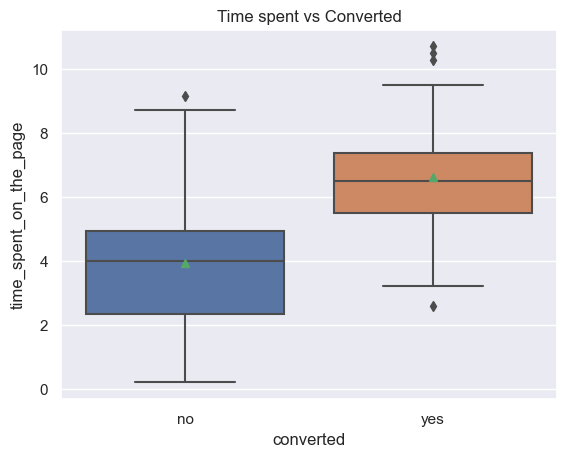

In [47]:
sns.boxplot(x = 'converted', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Time spent vs Converted')
plt.show()

more the time spent by the user on the webportal, it is like that user will get converted.

9. Language preferred vs Converted

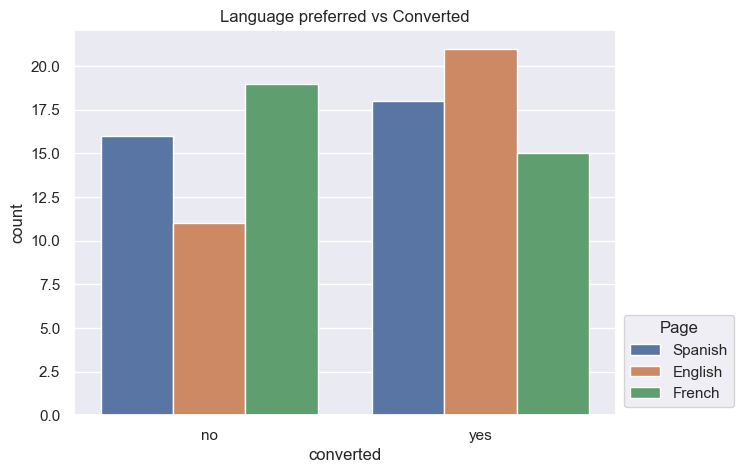

In [49]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
bar_perc=(ax, data['converted'])
plt.title('Language preferred vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.28))
plt.show()

the conversion rate of the users preferring English is the highest followed by Spanish and then French

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

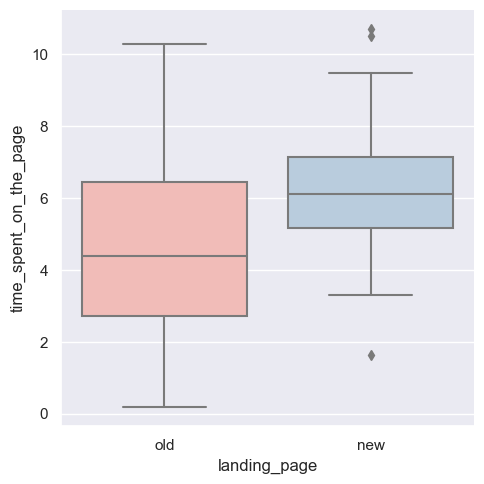

In [33]:
sns.catplot(x="landing_page", y="time_spent_on_the_page", kind="box", data=data,
palette="Pastel1")

<Figure size 700x500 with 0 Axes>

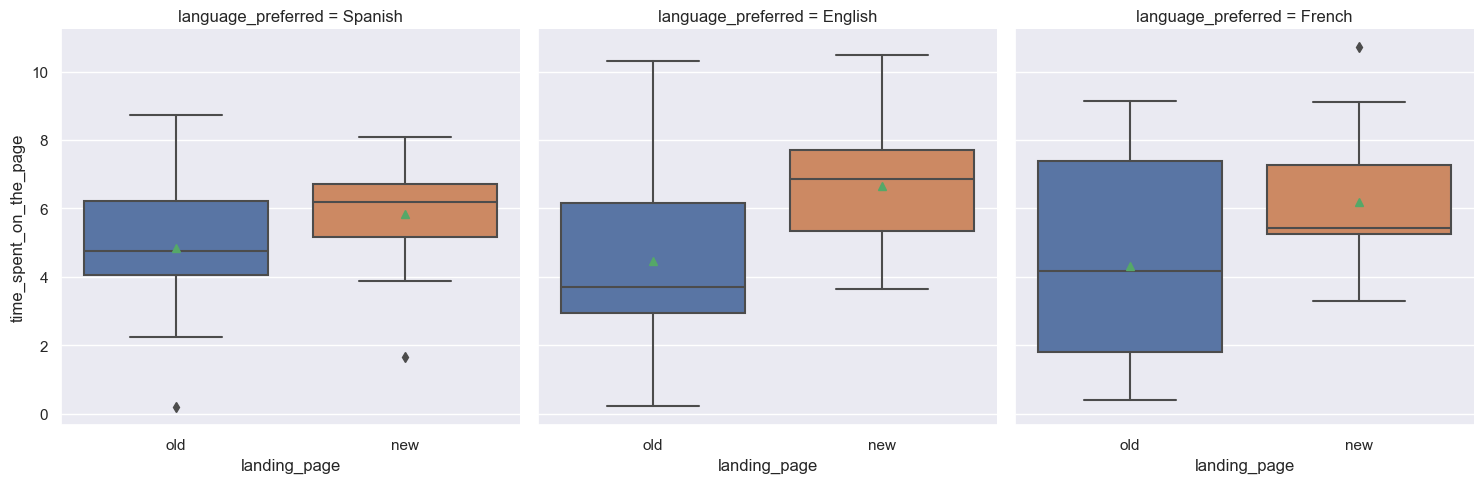

In [38]:
plt.figure(figsize = (7,5))
sns.catplot(x = 'landing_page', y = 'time_spent_on_the_page', col = 'language_preferred', data = data, kind = 'box', showmeans = True)
plt.show() 

Hence, we can conclude that the time spent on the new landing page is higher compared to the old landing page irrespective of the language preferred.
Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the time spent on the new landing page is higher than the time spent on the old landing page.

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: The conversion rate for the new page is equal to that of the old page. 

Alternate Hypothesis:The conversion rate for the new page is greater than that of the old page.

Let

µ1 = time spent on the new landing page and

µ2 = time spent on the old landing page


Testing the null hypothesis

Ho : µ1 <= µ2


against the alternative hypothesis

Ha : µ1 > µ2


### Step 2: Select Appropriate test

Observable qualities:

• Test for equality of two means

• Unknown standard deviation

Due to the fulfilment of the above 2 qualities, the Two independent sample t-test
is selected.

### Step 3: Decide the significance level

level of significance 0.05

### Step 4: Collect and prepare data

In [52]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [53]:
data_timespent = data.pivot(columns = 'landing_page', values = 'time_spent_on_the_page')
data_timespent.head()

landing_page,new,old
0,NaN,3.48
1,7.13,NaN
2,4.40,NaN
3,NaN,3.02
4,4.75,NaN


In [54]:
data_timespent.shape

(100, 2)

In [55]:
data_timespent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   new     50 non-null     float64
 1   old     50 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


In [56]:
data_timespent.describe()

landing_page,new,old
count,50.000000,50.000000
mean,6.223200,4.532400
std,1.817031,2.581975
min,1.650000,0.190000
25%,5.175000,2.720000
50%,6.105000,4.380000
75%,7.160000,6.442500
max,10.710000,10.300000


In [57]:
print('Mean time spent on the new page : ', data_timespent['new'].mean())
print('Mean time spent on the old page : ', data_timespent['old'].mean())
print('Standard deviation of time spent on the new page : ', data_timespent['new'].std())
print('Standard deviation of time spent on the old page : ', data_timespent['old'].std())

Mean time spent on the new page :  6.2232
Mean time spent on the old page :  4.532400000000001
Standard deviation of time spent on the new page :  1.8170310387878263
Standard deviation of time spent on the old page :  2.581974849306046


In [64]:
time_new = data.query('landing_page == "new"')['time_spent_on_the_page']
time_old = data.query('landing_page == "old"')['time_spent_on_the_page']


In [65]:
data.groupby('landing_page').describe()

time_spent_on_the_page                                        \
                              count    mean       std   min    25%    50%   
landing_page                                                                
new                            50.0  6.2232  1.817031  1.65  5.175  6.105   
old                            50.0  4.5324  2.581975  0.19  2.720  4.380   

                             
                 75%    max  
landing_page                 
new           7.1600  10.71  
old           6.4425  10.30

### Step 5: Calculate the p-value

In [58]:
from scipy.stats import ttest_ind

In [60]:
test_stat, p_value = ttest_ind(data_timespent['new'].dropna(), data_timespent['old'].dropna(), equal_var = False,alternative = 'greater')                  
                                                                
print('p-value : ', p_value)

p-value :  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [62]:
import scipy.stats as stats

# Assume that you have performed a statistical test and obtained the p-value
p_value = 0.03

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("The p-value is less than the significance level, so we reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to the significance level, so we fail to reject the null hypothesis.")

The p-value is less than the significance level, so we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.03) is less than the level of significance, we can reject the null
hypothesis. Hence, we do not have enough evidence to support the claim that the
conversion rate for the new page is the same as the conversion rate for the old page.

observation : The conversion rate for the new page is greater than the conversion rate for the old
page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

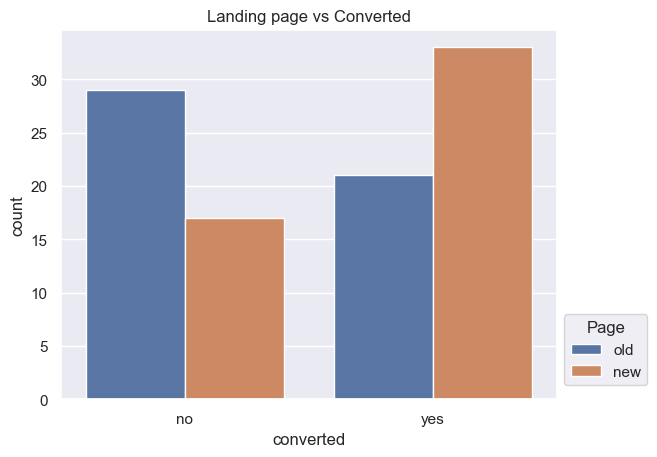

In [76]:
ax = sns.countplot(hue = 'landing_page', data = data, x = 'converted')
bar_perc=(ax, data['converted'])
plt.title('Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.25))
plt.show()

<Figure size 500x500 with 0 Axes>

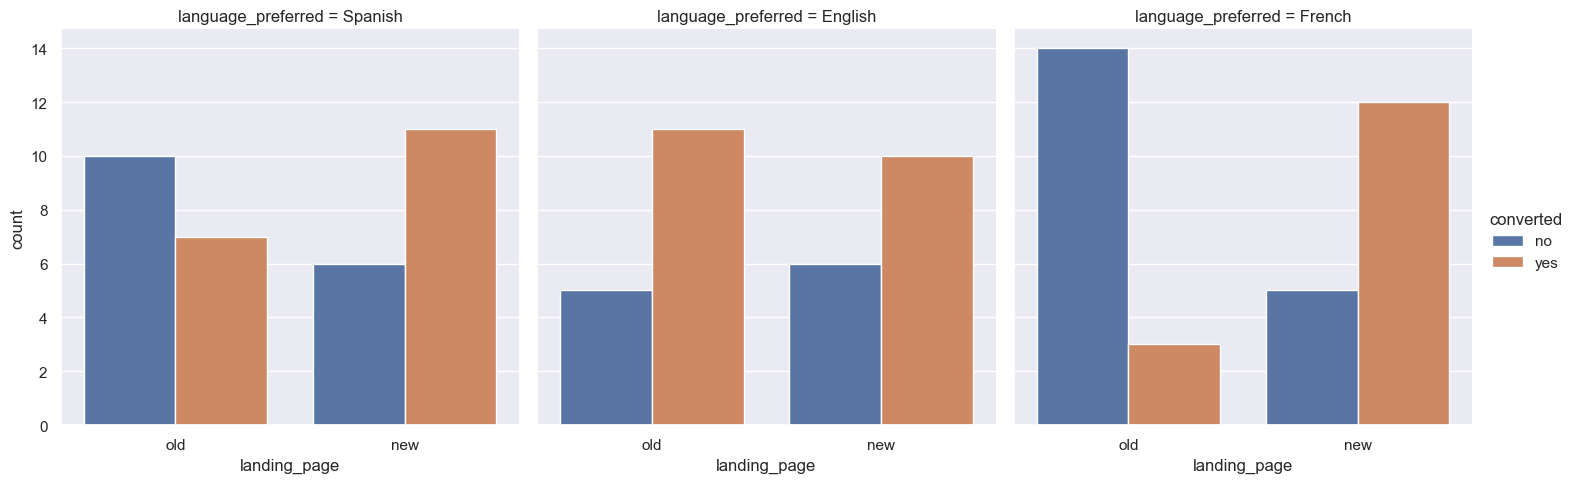

In [77]:
plt.figure(figsize = (5,5))
sns.catplot(x = 'landing_page', hue = 'converted', col = 'language_preferred', data = data, kind = 'count')
plt.show()

### Statistical Analysis

1. Defining the hypothesis

Let,

p1 = proportion of users who visit the new landing page and get converted

p2 = proportion of users who visit the old landing page and get converted 

Testing the null hypothesis

Ho : p1 <= p2

against the alternative hypothesis

Ha : p1 > p2

with a level of significance 0.05

2. Preparing the data

In [67]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [68]:
data_conv = data.pivot(columns = 'landing_page', values = 'converted')
data_conv.head() 

landing_page,new,old
0,NaN,no
1,yes,NaN
2,no,NaN
3,NaN,no
4,yes,NaN


In [69]:
data_conv.shape

(100, 2)

In [70]:
data_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   new     50 non-null     object
 1   old     50 non-null     object
dtypes: object(2)
memory usage: 2.3+ KB


In [71]:
print('Conversion count of users for the new landing page :\n', data_conv['new'].value_counts())

Conversion count of users for the new landing page :
 yes    33
no     17
Name: new, dtype: int64


In [72]:
print('Conversion count of users for the old landing page :\n', data_conv['old'].value_counts())

Conversion count of users for the old landing page :
 no     29
yes    21
Name: old, dtype: int64


3. Identifying the right test

From the above steps, I conclude to perform Two Proportions Z-Test.

checking if np and n(1-p) values for both the landing pages are >= 10

n = 50 # number of observations is 50 for each

p1 = 33/50 # probability of success for new landing page

p2 = 21/50 # success probability for old landing page

np1 = 33

n(1-p1) = 17

np2 = 21

n(1-p2) = 29

4. Checking if Z-test assumptions are satisifed or not

Binomially distributed population - Yes, the user either becomes a subscriber or not.
Independent populations - Yes.
Random sampling - Yes.
Can the binomial distribution be approximated to a Normal distribution? - Yes, the np and n(1-p) values for both samples are >= 10
Since all the assumptions are satisfied, we can use the Z-test for this problem.

5. Performing the test

In [73]:
from statsmodels.stats.proportion import proportions_ztest

In [74]:
conv_count = np.array([33,21])
nobs = np.array([50,50])
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative = 'larger')
print('p-value : ', p_value)

p-value :  0.008026308204056278


Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page

## 3. Is the conversion and preferred language are independent or related?

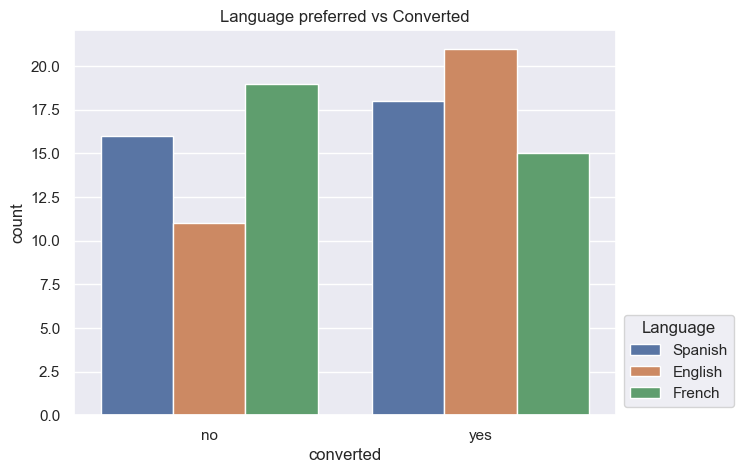

In [79]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
bar_perc=(ax, data['converted'])
plt.title('Language preferred vs Converted')
plt.legend(title = 'Language', bbox_to_anchor = (1,0.28))
plt.show()

<Figure size 700x500 with 0 Axes>

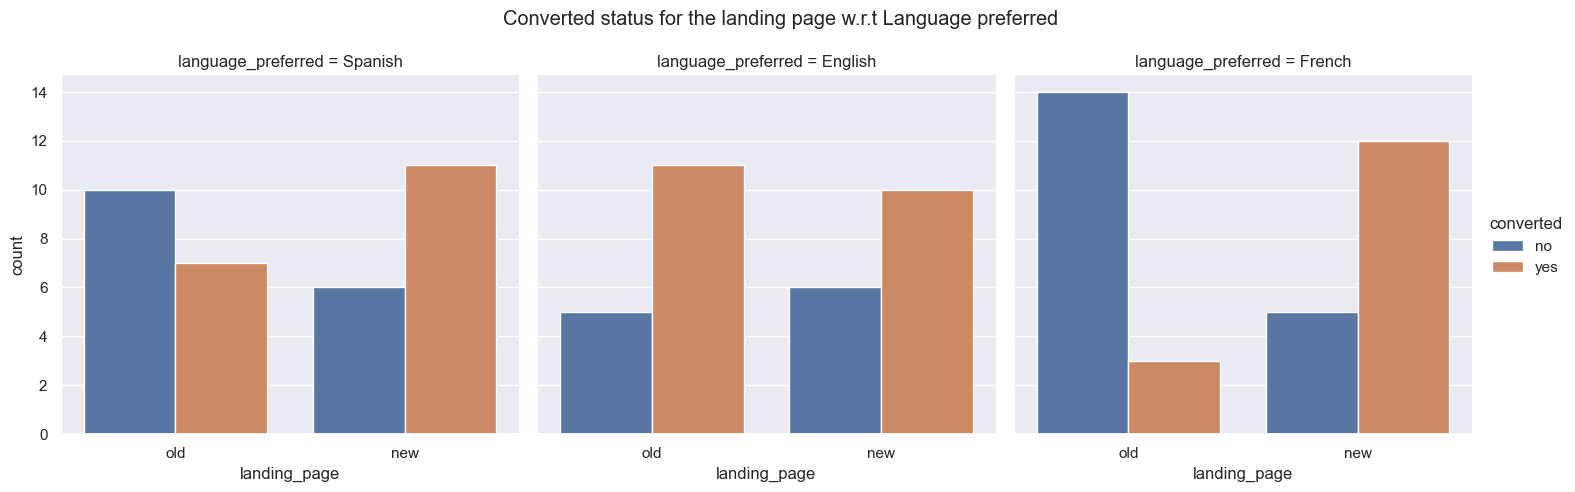

In [80]:
plt.figure(figsize = (7,5))
ct = sns.catplot(x = 'landing_page', hue = 'converted', col = 'language_preferred', data = data, kind = 'count')
ct.fig.subplots_adjust(top=0.85)         
plt.suptitle('Converted status for the landing page w.r.t Language preferred') 
plt.show()

Statistical Analysis

1. Defining the hypothesis

Testing the null hypothesis

Ho : Converted status is independent of language preferred

against the alternative hypothesis

Ha : Converted status depends on language preferred

with a level of significance 0.05

2. Preparing the data

In [81]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [82]:
data_cont = pd.crosstab(data['converted'], data['language_preferred'])
data_cont

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


3. Identifying the right test

As the question is to determine if the converted status depends on the language preferred, I conclude to perform the Chi-Square Test for Independence.

4. Checking if the assumptions for the test are satisifed or not

Categorical variable - Yes, both language preferred and converted status are categorical.
Expected value of the number of sample observations in each level of the variable is atleast 5 - Yes, the number of observations in each level is greater than 5.
Random sampling from the population - Yes.
Since the assumptions are all satisfied, we can apply the Chi-Square Test for Independence.

5. Performing the test

In [83]:
from scipy.stats import chi2_contingency

In [84]:
chi, pval, dof, exp_freq = chi2_contingency(data_cont)  
print('p-value : ', pval)

p-value :  0.21298887487543447


Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the conversion rate is independentof the language preferred.

## 4. Is the time spent on the new page same for the different language users?

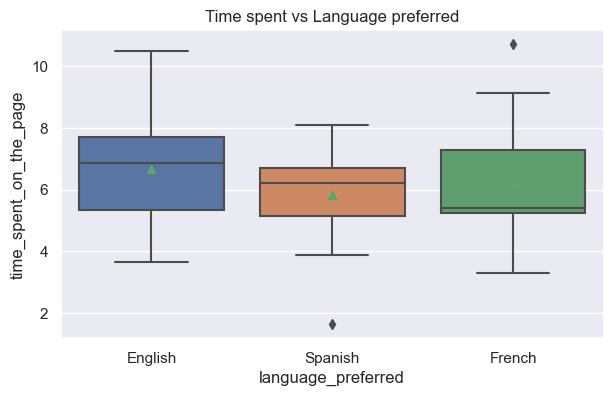

In [106]:
plt.figure(figsize = (7,4))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = new_pg, showmeans = True)
plt.title('Time spent vs Language preferred')
plt.show()

<Figure size 700x500 with 0 Axes>

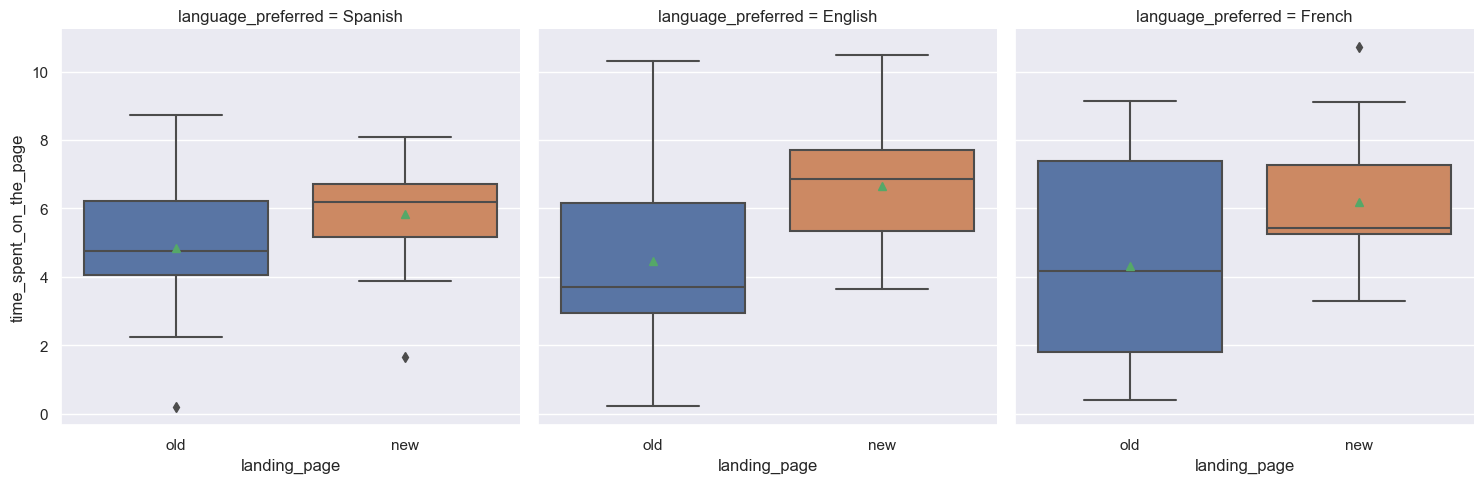

In [107]:
plt.figure(figsize = (7,5))
sns.catplot(x = 'landing_page', y = 'time_spent_on_the_page', col = 'language_preferred', data = data, kind = 'box', showmeans = True)
plt.show()

Statistical Analysis
1. Defining the hypothesis

Testing the null hypothesis

Ho : The mean time spent on the new landing page w.r.t the languages are all equal

against the alternative hypothesis

Ha : The mean time spent w.r.t. atleast one of the three languages is different

with a level of significance 0.05

2. Preparing the data

In [94]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [95]:
new_pg = data[data['landing_page']=='new']   
new_pg.head()      

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [96]:
new_pg.shape  

(50, 6)

In [97]:
new_pg['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [98]:
new_pg.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

3. Identifying the right test

The question is based on the mean time spent on the new page by three different language users. Basically it is a test for means for more than two populations, I conclude to perform the One-way ANOVA F-test.

4. Checking if test assumptions are satisifed or not

The normality and equality of variance assumptions are checked below for the response variable time_spent_onthe page.

Normality check with Shapiro-Wilk'sTest

Testing the null hypothesis

Ho : Time spent follows normal distribution

against the alternative hypothesis

Ha : Time spent does not follow normal distribution

with a level of significance 0.05

In [99]:
from scipy.stats import shapiro

In [100]:
test_stat, p_value = shapiro(new_pg['time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.8040016293525696


Equality check with Levene's Test

Testing the null hypothesis

Ho : All the population variances are equal

against the alternative hypothesis

Ha : Atleast one variance is different from the rest

In [101]:
from scipy.stats import levene

In [103]:
test_stat, p_value = levene(new_pg['time_spent_on_the_page'][new_pg['language_preferred']=='English'],new_pg['time_spent_on_the_page'][new_pg['language_preferred']== 'French'],new_pg['time_spent_on_the_page'][new_pg['language_preferred']=='Spanish'])
print('p-value : ', p_value)

p-value :  0.46711357711340173


5. Checking if ANOVA test assumptions are satisifed or not

The populations are normally distributed - Yes, it is verified using the Shapiro-Wilk's test.
Population variances are equal - Yes, the homogeneity of varaince assumption is verified using the Levene's test.
Independent random samples - Yes.
As all the assumptions are staisfied, we can perform the One-way ANOVA F test.

6. Performing the test

In [104]:
from scipy.stats import f_oneway

In [105]:
test_stat, p_value = f_oneway(new_pg.loc[new_pg['language_preferred']=='English','time_spent_on_the_page'],new_pg.loc[new_pg['language_preferred']=='French','time_spent_on_the_page'],new_pg.loc[new_pg['language_preferred']=='Spanish','time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.43204138694325955


Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the mean time spent on the new page for the different language users are same.

## Conclusion and Business Recommendations

Based on the statistical and visual analysis conducted, it can be inferred that, at a 5% significance level:

The new landing page has a higher user engagement, as users spend more time on it compared to the old landing page.
The conversion rate for the new landing page is superior to that of the old landing page.
The choice of language does not influence the conversion status.
The average time spent on the new landing page is consistent across different language preferences.
Overall, the data provides sufficient statistical and visual evidence to support the idea that the business would benefit significantly from the introduction of the new landing page.

___